In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import os
import time

os.chdir("../")

In [54]:
solution_path = "./main.exe"

num_tests = 10
max_threads = 20
num_attempts = 5

results = {}

for i in range(num_tests):
    results[i] = {}

    for nthreads in range(1, max_threads + 1):
        avg = 0

        for attempt in range(num_attempts):
            ini = time.time()
            subprocess.call([solution_path, str(nthreads), f"input/test-{i}.txt", "output/bin.txt"])
            end = time.time()

            avg += end - ini

        results[i][nthreads] = avg / num_attempts

df = pd.DataFrame(results)

df

,0,1,2,3,4,5,6,7,8,9
1,0.026173,0.021777,0.021537,0.021760,0.022000,0.018986,0.013503,0.183590,0.015841,0.015699
2,0.025439,0.018462,0.019768,0.018374,0.018865,0.012714,0.014956,0.141372,0.011584,0.012928
3,0.023919,0.027584,0.019637,0.020840,0.019548,0.013253,0.014959,0.209831,0.012025,0.012936
4,0.017742,0.019886,0.022451,0.020877,0.020337,0.014556,0.014486,0.159553,0.012185,0.012818
5,0.019113,0.019869,0.021058,0.022117,0.020193,0.013872,0.012528,0.154698,0.012475,0.012726
6,0.022294,0.024205,0.020846,0.021594,0.022148,0.012541,0.013003,0.160649,0.013537,0.012416
7,0.022635,0.035384,0.022309,0.023733,0.023554,0.011612,0.015997,0.165375,0.012196,0.011805
8,0.021216,0.021901,0.022544,0.023397,0.030498,0.014258,0.015136,0.150398,0.017987,0.012256
9,0.021426,0.022173,0.022813,0.023536,0.028534,0.013346,0.016580,0.150276,0.015242,0.012545
10,0.021480,0.024236,0.023413,0.022996,0.026156,0.016219,0.028715,0.149192,0.012791,0.012336


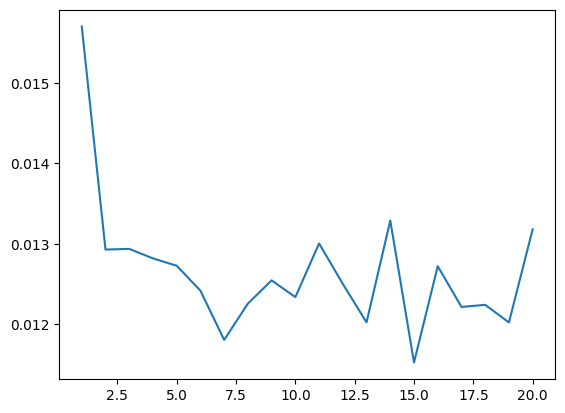

In [64]:
filtered_df = df[9]

plt.plot(filtered_df.index, filtered_df)
plt.show()

In [52]:
[(10, 15)] + [(50, 25 * 2**i) for i in range(4)] + [(100, 150)] + [(500, 250 * 2**i) for i in range(3)] + [(1000, 1500)]

[(10, 15),
 (50, 25),
 (50, 50),
 (50, 100),
 (50, 200),
 (100, 150),
 (500, 250),
 (500, 500),
 (500, 1000),
 (1000, 1500)]